# 2. Diamonds 데이터분석 캡스톤

In [78]:
origin = load_data('diamonds')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n===== 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/kaggle/diamonds.xlsx
[desc] 다이아몬드를 커팅, 색상, 투명도, 가격 및 기타 속성 조사한 데이터 셋 (출처: https://www.kaggle.com/datasets/shivam2503/diamonds)

field    description
-------  -------------------------------------------------------------------
price    다이아몬드 가격 (USD, $326 ~ $18,823)
carat    중량 (0.2~5.01)
cut      컷 품질 (Fair, Good, Very Good, Premium, Ideal)
color    색상 등급 - J (worst) to D (best)
clarity  투명도 등급 (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x        길이 mm (0~10.74)
y        너비 mm (0--58.9)
z        두께 mm (0--31.8)
depth    비율 정보 = z / mean(x, y) = 2 * z / (x + y) (43--79)
table    다이아몬드의 가장 넓은 지점에 비해 상단(테이블)의 너비 (43--95)


===== 데이터 크기 확인 =====
데이터셋 크기: (53940, 10)
열 갯수: 10
행 갯수: 53940

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940

,price,carat,cut,color,clarity,x,y,z,depth,table
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0


## 미션1.

### 결측치 여부

In [79]:
df = origin.copy()

df.isna().sum()

price      0
carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
dtype: int64

> 결측치 없음

### 이상치 여부

이상치는 연속형 데이터에서 보자

#### 유난히 튀는 값

In [80]:
# 명목형 변수 제거
nominal = ['cut', 'color', 'clarity']
df2 = df.drop(nominal, axis=1)
df2

,price,carat,x,y,z,depth,table
0,326,0.23,3.95,3.98,2.43,61.5,55.0
1,326,0.21,3.89,3.84,2.31,59.8,61.0
2,327,0.23,4.05,4.07,2.31,56.9,65.0
3,334,0.29,4.20,4.23,2.63,62.4,58.0
4,335,0.31,4.34,4.35,2.75,63.3,58.0
...,...,...,...,...,...,...,...
53935,2757,0.72,5.75,5.76,3.50,60.8,57.0
53936,2757,0.72,5.69,5.75,3.61,63.1,55.0
53937,2757,0.70,5.66,5.68,3.56,62.8,60.0
53938,2757,0.86,6.15,6.12,3.74,61.0,58.0


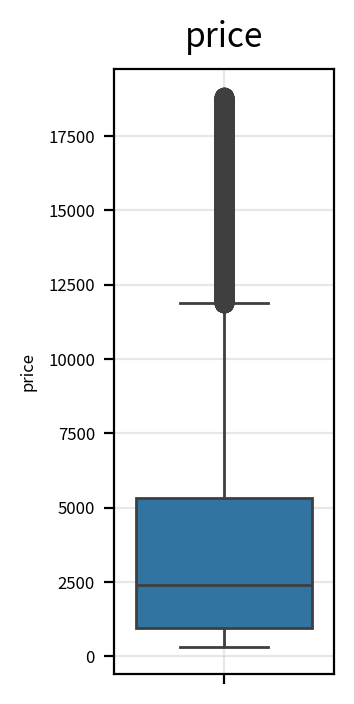

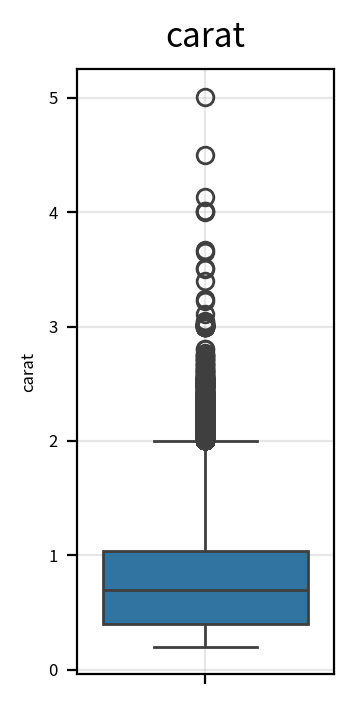

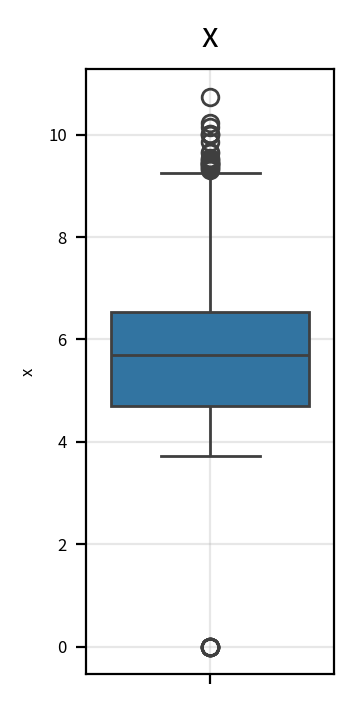

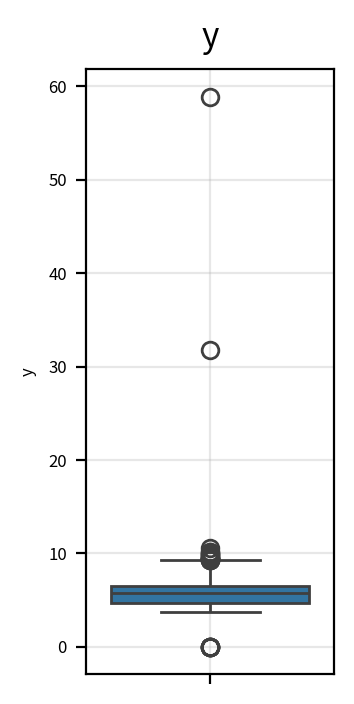

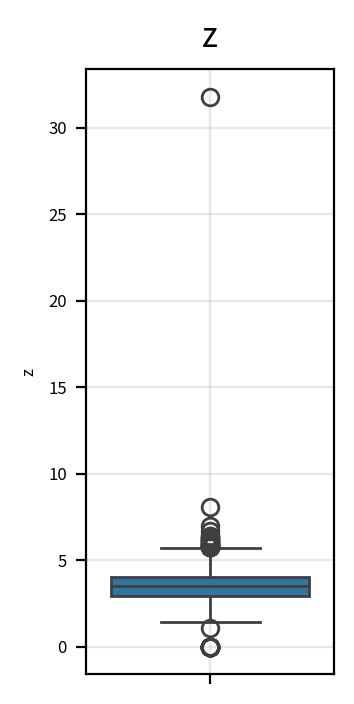

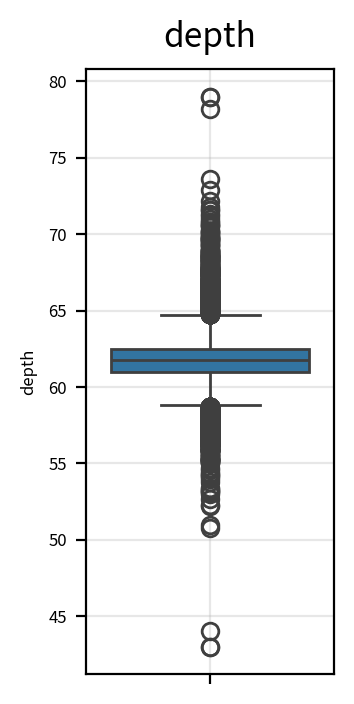

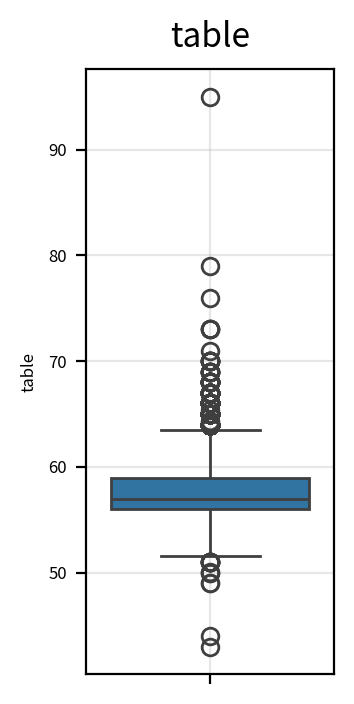

In [81]:
# 연속형 변수가 7개로 홀수여서 서브플롯 하기엔 애매쓰
# -> boxplot 반복문 돌리자

for item in df2.columns:
    # 1) 그래프 초기화
    width_px = 350         # 그래프 가로 크기
    height_px = 700        # 그래프 세로 크기
    rows = 1                # 그래프 행 수 ≠ 1
    cols = 1                # 그래프 열 수 ≠ 1
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

    # 2) 그래프 그리기
    sb.boxplot(data=df2, y=item)

    # 3) 그래프 꾸미기
    ax.set_title(item, pad = 8, fontsize = 12)
    ax.grid(True, alpha=0.3)                # 배경, 격자 표시/숨김

    # 4) 출력
    plt.tight_layout()                          # 여백 제거
    plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

> 1. 모든 변수에서 튀는 값들이 관찰 되었다.
>
> 2. 길이 단위를 쓰는 변수 x, y, z에서 말이 안되는 값(0)의 존재도 시각화로 확인되는데
> 
> x, y, z 중 하나라도 0을 가지는 다이아몬드 데이터에서 `종속변수인 price`랑 `중량 단위를 쓰는 변수 carat`에 값이 있는지 확인할 필요가 있다.
>  
> 만약 price랑 caratrk 0이 아닌 값을 가짐이 보여진다면 길이값 0도 말이 안됨이 반증이 되기 떄문이다. 

#### 말이 안되는 값(ex. x, y, z=0)

In [82]:
# x, y, z의 곱 변수 `vol(부피)`을 파생시킨 후
# 이 변수(vol)의 값이 0이면 "적어도" 세 변수 x, y, z 중 하나는 0이라는 것이니
# 이를 이용해서 vol=0인 데이터의 price랑 carat 확인하면 됨

df2['vol'] = df2['x'] * df2['y'] * df2['z']
# df2

zero_len = df2.query("vol == 0")
print(len(zero_len))
zero_len

20


,price,carat,x,y,z,depth,table,vol
2207,3142,1.00,6.55,6.48,0.0,59.1,59.0,0.0
2314,3167,1.01,6.66,6.60,0.0,58.1,59.0,0.0
4791,3696,1.10,6.50,6.47,0.0,63.0,59.0,0.0
5471,3837,1.01,6.50,6.47,0.0,59.2,58.0,0.0
10167,4731,1.50,7.15,7.04,0.0,64.0,61.0,0.0
11182,4954,1.07,0.00,6.62,0.0,61.6,56.0,0.0
11963,5139,1.00,0.00,0.00,0.0,63.3,53.0,0.0
13601,5564,1.15,6.88,6.83,0.0,59.2,56.0,0.0
15951,6381,1.14,0.00,0.00,0.0,57.5,67.0,0.0
24394,12631,2.18,8.49,8.45,0.0,59.4,61.0,0.0


> 부피(vol)가 0인 데이터는 총 20개이고, 이들도 price랑 carat값을 가지고 있음이 확인 되었다
>
> 즉, x, y, z 에서 0이 나온다는건 말이 안되는 값들인거고
>
> 이 말이 되지 않는 값과 유난히 튀는 값들을 가지는 변수들의 `데이터 전처리`는 `'≤ outline_min', 'outline_max ≤' 범위의 값들을 다 q1, q3로 몰거다.`

In [83]:
# 각 연속형 변수들의 `상한극단치경계`랑 `하한극단치경계` 찾기:
# df2.head()
for line in df2.columns:
    q1 = df2[line].quantile(0.25)
    q3 = df2[line].quantile(0.75)
    iqr = q3 - q1
    outline_min = q1 - iqr * 1.5
    outline_max = q3 + iqr * 1.5

    print(f"========= {line} =========")
    print(f"하한 극단치 경계:", outline_min)
    print(f"상한 극단치 경계:", outline_max)
    print(f"상한 극단치 경계를 벗어난 데이터 수:",len(df2[outline_max < df2[line]]))

    df2.loc[df2[line] < outline_min, line] = outline_min
    df2.loc[df2[line] > outline_max, line] = outline_max

df2.drop('vol', axis=1, inplace=True)
df2.head()

========= price =========
하한 극단치 경계: -5611.375
상한 극단치 경계: 11885.625
상한 극단치 경계를 벗어난 데이터 수: 3540
========= carat =========
하한 극단치 경계: -0.5599999999999999
상한 극단치 경계: 2.0
상한 극단치 경계를 벗어난 데이터 수: 1889
========= x =========
하한 극단치 경계: 1.9649999999999999
상한 극단치 경계: 9.285
상한 극단치 경계를 벗어난 데이터 수: 24
========= y =========
하한 극단치 경계: 1.9899999999999993
상한 극단치 경계: 9.27
상한 극단치 경계를 벗어난 데이터 수: 22
========= z =========
하한 극단치 경계: 1.2150000000000003
상한 극단치 경계: 5.734999999999999
상한 극단치 경계를 벗어난 데이터 수: 28
========= depth =========
하한 극단치 경계: 58.75
상한 극단치 경계: 64.75
상한 극단치 경계를 벗어난 데이터 수: 1039
========= table =========
하한 극단치 경계: 51.5
상한 극단치 경계: 63.5
상한 극단치 경계를 벗어난 데이터 수: 589
========= vol =========
하한 극단치 경계: -93.42160075000001
상한 극단치 경계: 329.40088125
상한 극단치 경계를 벗어난 데이터 수: 1320


C:\Users\itwill\AppData\Local\Temp\ipykernel_20896\2645525509.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-5611.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2[line] < outline_min, line] = outline_min


,price,carat,x,y,z,depth,table
0,326.0,0.23,3.95,3.98,2.43,61.50,55.0
1,326.0,0.21,3.89,3.84,2.31,59.80,61.0
2,327.0,0.23,4.05,4.07,2.31,58.75,63.5
3,334.0,0.29,4.20,4.23,2.63,62.40,58.0
4,335.0,0.31,4.34,4.35,2.75,63.30,58.0


### 명목형 변수: 변수 당 범주, 데이터 몰빵여부

In [84]:
# 변수 당 범주 갯수:
df3 = df.describe(include='object')
display(df3)

# 데이터 몰빵여부: 범주 별 비율로:
nominal = ['cut', 'color', 'clarity']
for c in nominal:
    print("====", c, "====")
    print(df[c].value_counts(normalize=True).round(3))

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


==== cut ====
cut
Ideal        0.400
Premium      0.256
Very Good    0.224
Good         0.091
Fair         0.030
Name: proportion, dtype: float64
==== color ====
color
G    0.209
E    0.182
F    0.177
H    0.154
D    0.126
I    0.101
J    0.052
Name: proportion, dtype: float64
==== clarity ====
clarity
SI1     0.242
VS2     0.227
SI2     0.170
VS1     0.151
VVS2    0.094
VVS1    0.068
IF      0.033
I1      0.014
Name: proportion, dtype: float64


> `cut` 변수의 `ideal` 범주가 데이터 몰빵이 되있다 (전체 데이터 중 40%)

## 미션2. 가격 데이터분포 탐색

분포특성: 고르게?/특정구간 몰림? -> 정규성 확인, 로그변환 필요유무 확인

### price랑 carat 데이터 분포 확인

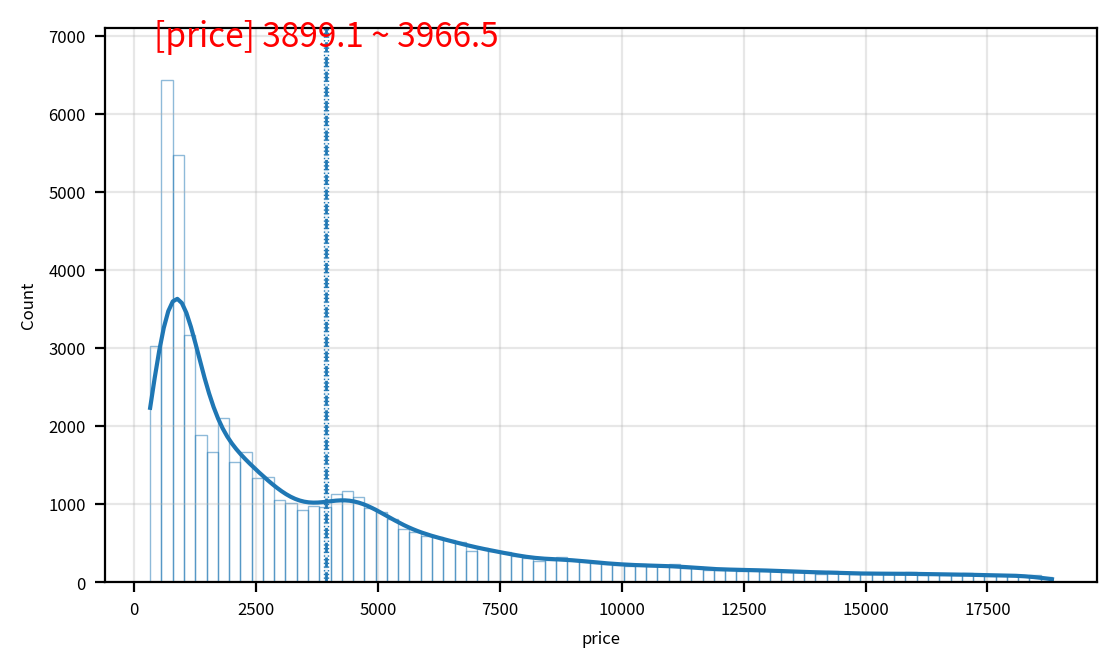

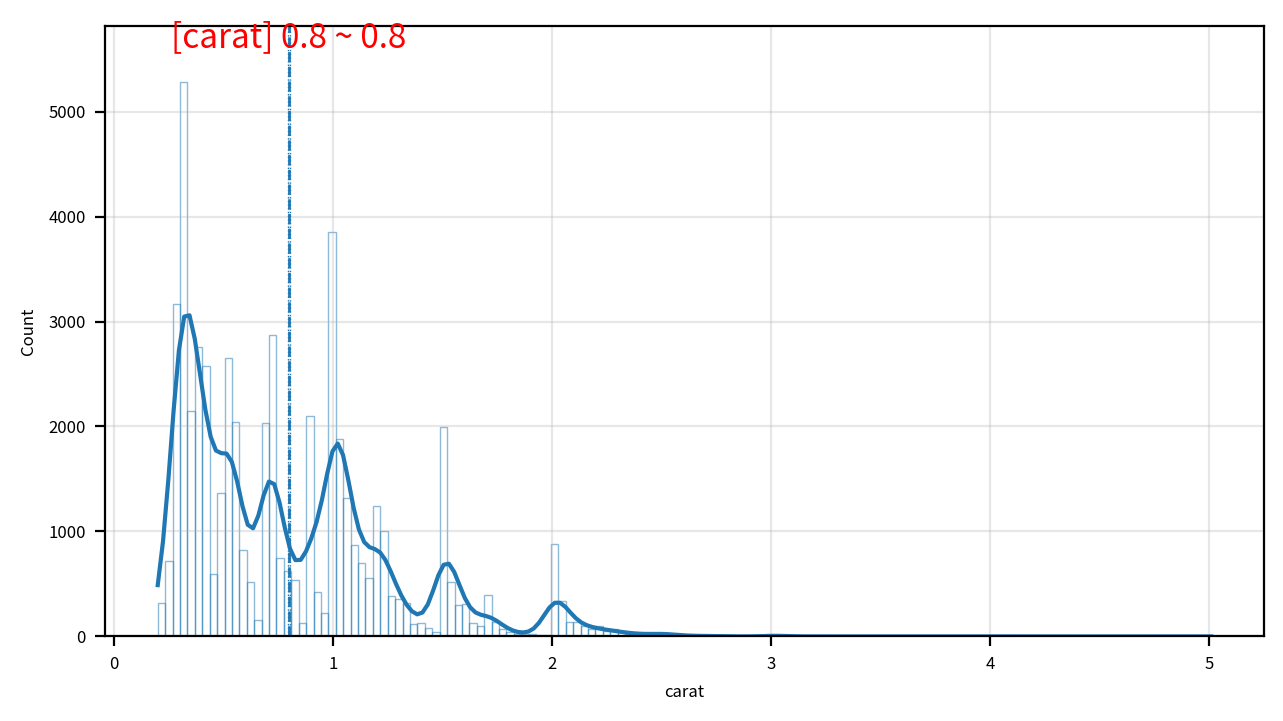

In [85]:
data = df[['price', 'carat']]  # 확인할 데이터 (컬럼단위)

for item in data.columns:
    # 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
    width_px = 1280             # 그래프 가로 크기
    height_px = 720             # 그래프 세로 크기
    rows = 1                    # 그래프 행 수
    cols = 1                    # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

    # 2) KDE plot 그리기:
    sb.histplot(data=data, x=item, kde=True, fill=False, alpha=0.5)

    # 2-1) 신뢰구간용 기본변수:
    max = data[item].max()                        # 최대값
    dof = len(data[item]) - 1                     # 자유도
    clevel = 0.95                           # 신뢰수준
    sp_mean = data[item].mean()                   # 표본평균
    sp_std = data[item].std() # default: ddof=1   # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[item])) # 표본표준오차

    # 2-2) 신뢰구간 x값:
    cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

    ax.axvline(cmin, linestyle=":", linewidth=0.5) # cmin 경계선
    ax.axvline(cmax, linestyle=":", linewidth=0.5) # cmax 경계선

    # 2-3) 신뢰구간 y값:
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)

    # 2-4) 평균선 표시:
    ax.axvline(sp_mean, linestyle="--", linewidth=1)

    # 2-5) 텍스트 그리기 (statAnnotator 기능):
    ax.text(x = cmin + (cmax-cmin)/2,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (item, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size": 12, "color": "red"})

    # 3) 그래프 꾸미기: 
    ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

> 시각화를 통해서 알 수 있는 두 변수의 데이터분포에서의 
> 
> 1. 공통점:
>   - 두 변수 다 데이터가 고르게 분포해 있지 않다 (정규성 위반)
>   - 제일 큰 peak이 분포 초반에 나왔다가 변수 값이 커질수록 데이터 분포가 점진적으로 감소한다 
>   - 데이터가 정규성을 만족하지 못하므로 정규성 민감도를 줄이기 위해 `로그변환` 방법 등이 필요해보인다. 
> 2. 차이점:
>   - 두드러지는 peak의 갯수가 변수 `carat`에서는 여러번 나왔지만 `price` 에서는 1번 밖에 관찰이 되지 않는다
>   - 즉, price 데이터는 특정 구간에 몰빵되어 있다. 

## 미션3. 로그변환

### `price`, `carat`의 로그변환 전후 데이터 분포 비교

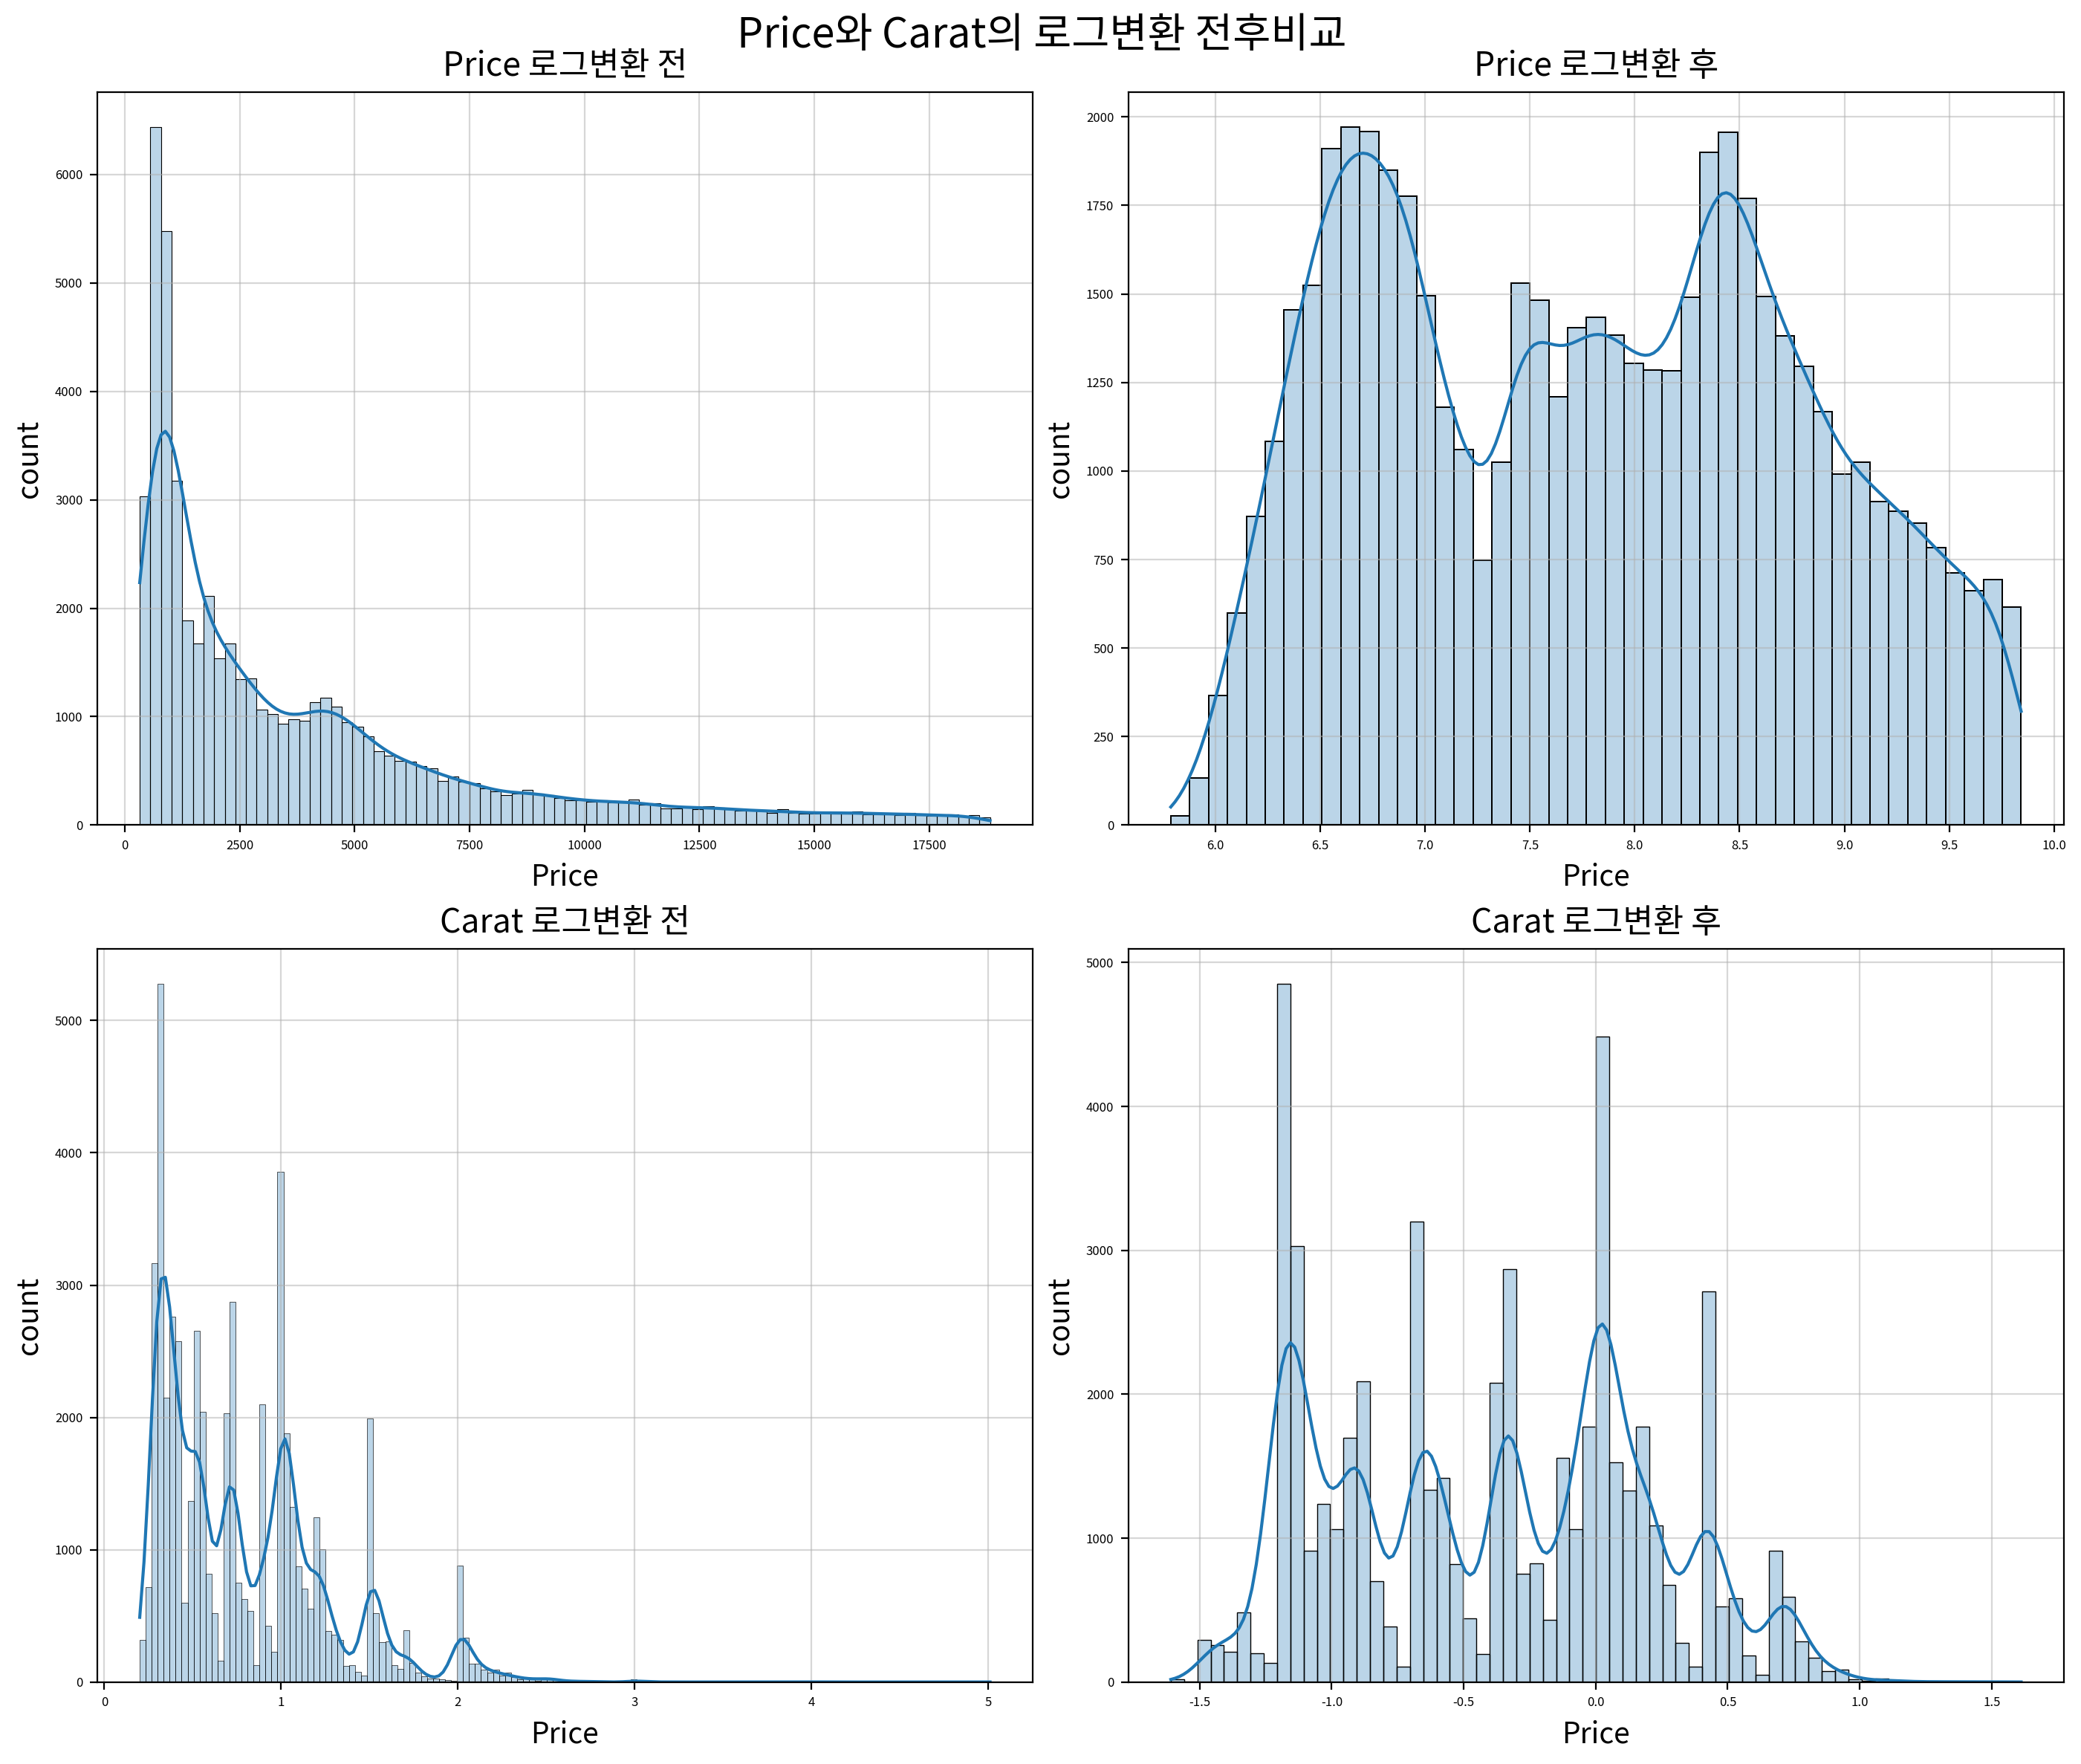

In [95]:
df['log_price'] = df['price'].map(np.log)
df['log_carat'] = df['carat'].map(np.log)
#df

# subplot 이용해서 분할그래프 만들기:
# 1) 그래프 초기화
width_px = 2800         # 그래프 가로 크기
height_px = 2400        # 그래프 세로 크기
rows = 2             # 그래프 행 수 ≠ 1
cols = 2             # 그래프 열 수 ≠ 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기
sb.histplot(data=df, ax=ax[0][0], x='price', kde=True, alpha=0.3)
sb.histplot(data=df, ax=ax[0][1], x='log_price', kde=True, alpha=0.3)
sb.histplot(data=df, ax=ax[1][0], x='carat', kde=True, alpha=0.3)
sb.histplot(data=df, ax=ax[1][1], x='log_carat', kde=True, alpha=0.3)

# 3) 그래프 꾸미기
# 전체 제목
fig.suptitle('Price와 Carat의 로그변환 전후비교', fontsize=20)
# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# 첫 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[0][0].set_title("Price 로그변환 전", fontsize=16, pad=8)
ax[0][0].grid(True, alpha=0.5)
ax[0][1].set_title("Price 로그변환 후", fontsize=16, pad=8)
ax[0][1].grid(True, alpha=0.5)
ax[0][0].set_xlabel("Price", labelpad = 5, fontsize = 14)
ax[0][0].set_ylabel("count", labelpad = 5, fontsize = 14)
ax[0][1].set_xlabel("Price", labelpad = 5, fontsize = 14)
ax[0][1].set_ylabel("count", labelpad = 5, fontsize = 14)

# 두 번째 영역 그래프의 x축 설정 및 x,y축 라벨 지정, 격자
ax[1][0].set_title("Carat 로그변환 전", fontsize=16, pad=8)
ax[1][0].grid(True, alpha=0.5)
ax[1][1].set_title("Carat 로그변환 후", fontsize=16, pad=8)
ax[1][1].grid(True, alpha=0.5)
ax[1][0].set_xlabel("Price", labelpad = 5, fontsize = 14)
ax[1][0].set_ylabel("count", labelpad = 5, fontsize = 14)
ax[1][1].set_xlabel("Price", labelpad = 5, fontsize = 14)
ax[1][1].set_ylabel("count", labelpad = 5, fontsize = 14)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료

> 로그변환의 효과: 특정 구간에 몰려있던 데이터의 분포를 고르게 해줌
> 
> -> 왜 써야 하는가는 데이터분포에서의 정규성 위반에 대한 민감도를 줄이기 위함이었다.

## 미션 4. 명목형 변수(`cut, color, clatiry`)별 가격 분포도 확인

> 시각화 그래프 what to use?
>
> 1. 독립변수: 명목형 / 종속변수: 연속형
> 2. 독립변수 개별로 종속변수와의 관계를 plotting 할거임
> 3. 독립변수 당 범주 갯수: 
>   - `cut`: 5개 
>   - `color`: 7개 
>   - `clarity`: 8개
>
> -> by 1, 2, 3: 각 명목형 변수 별로 `One-way ANOVA(if 정규성 만족)` 또는 `Kruskal-Wallis(if 정규성 만족 X)` 쓸거임
> use: 독립변수 별로 kde plotting

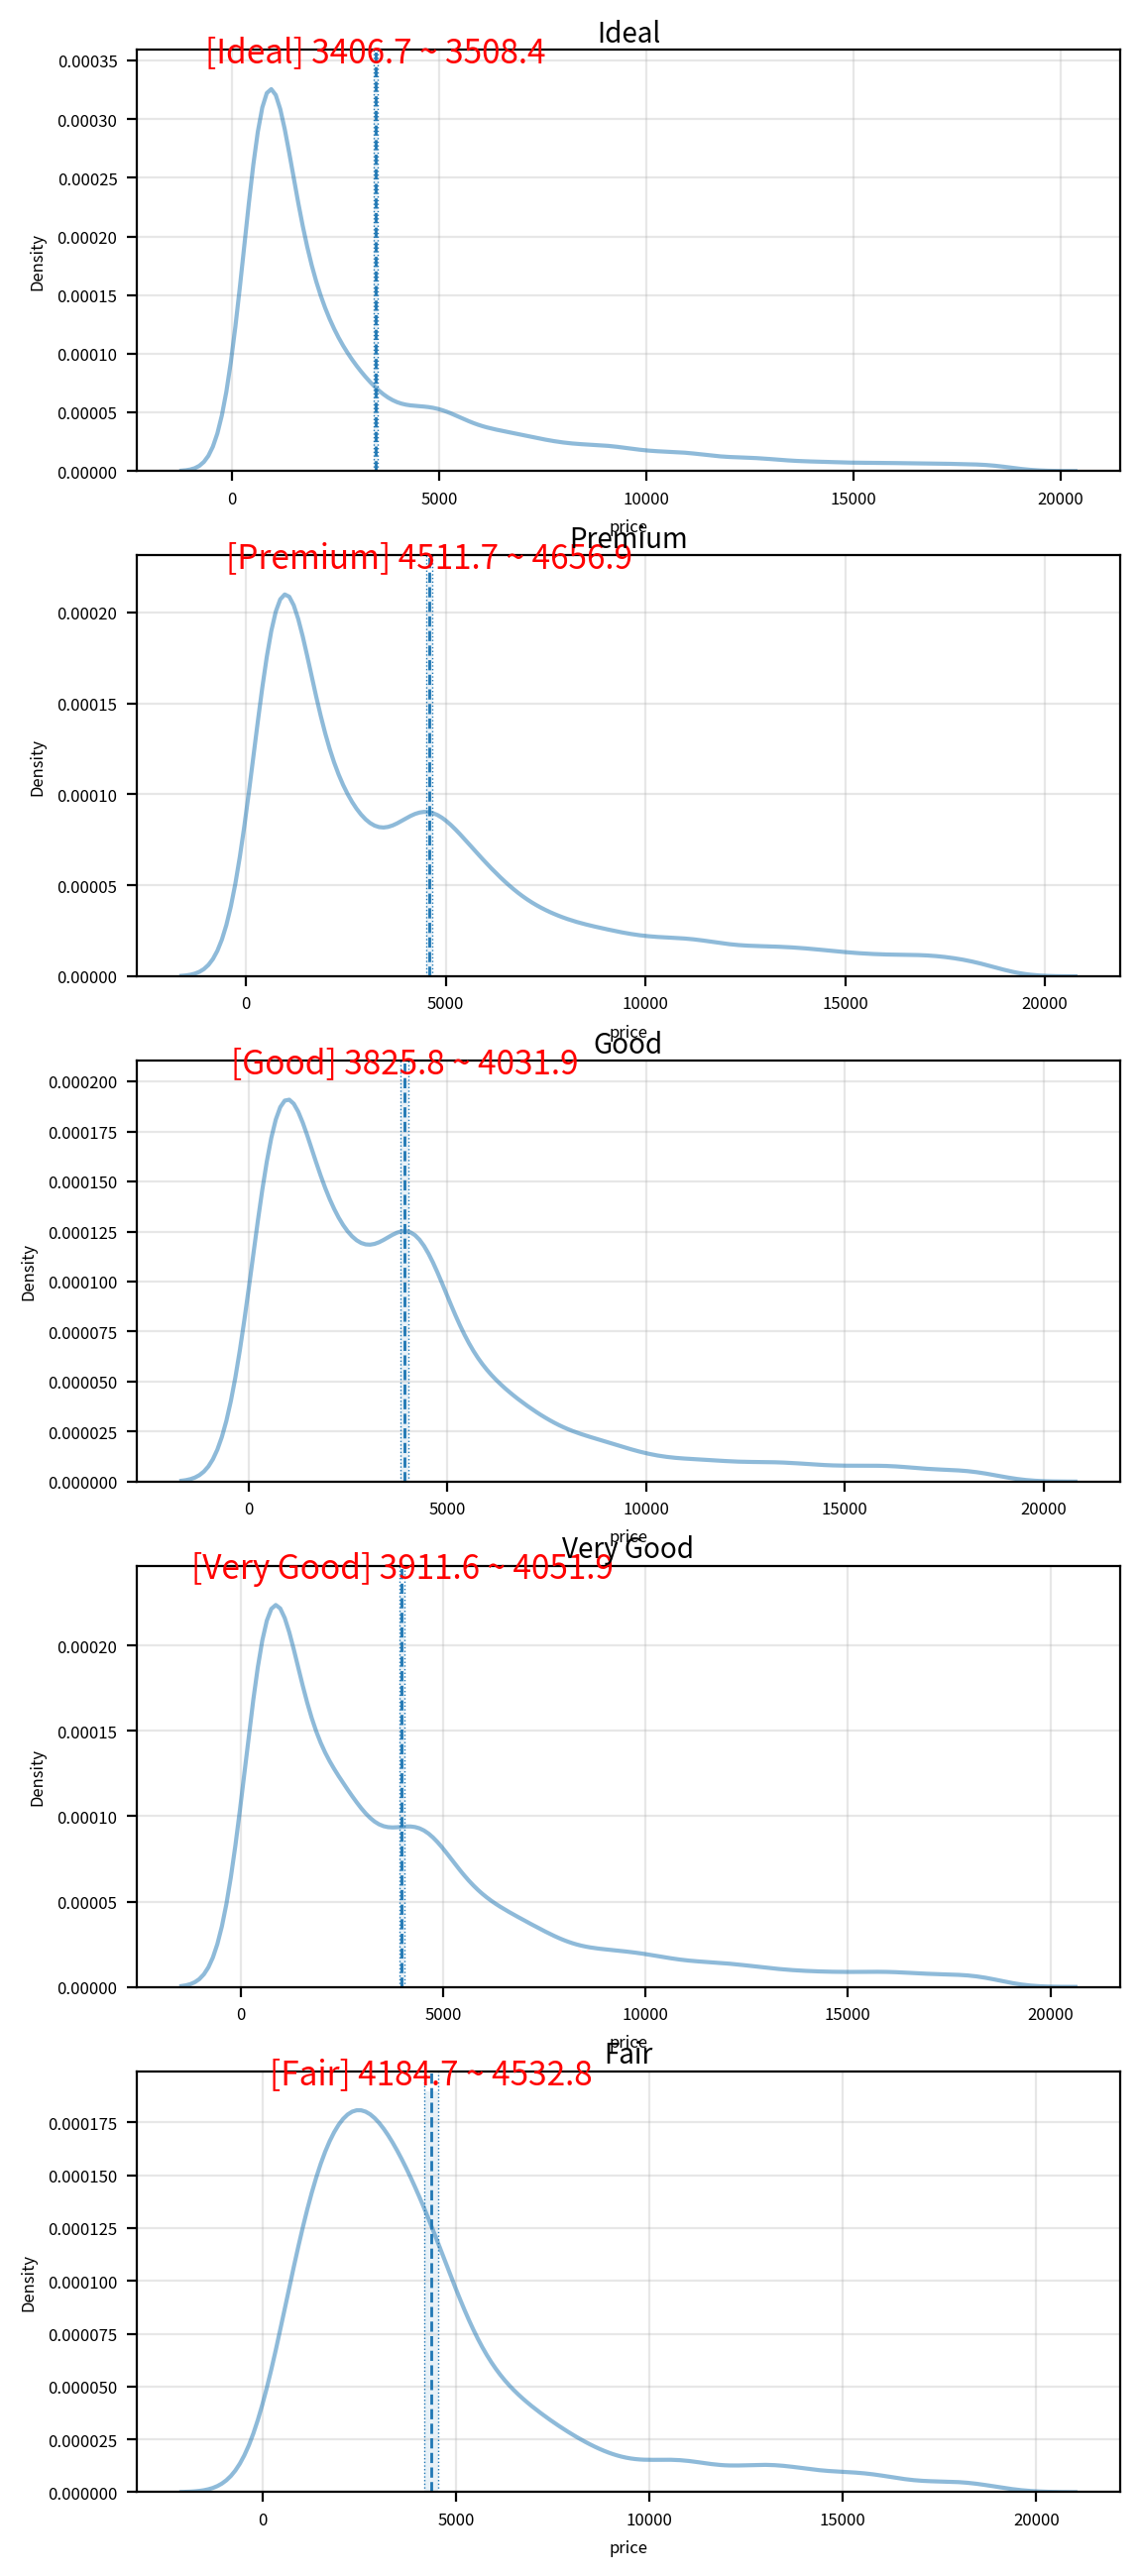

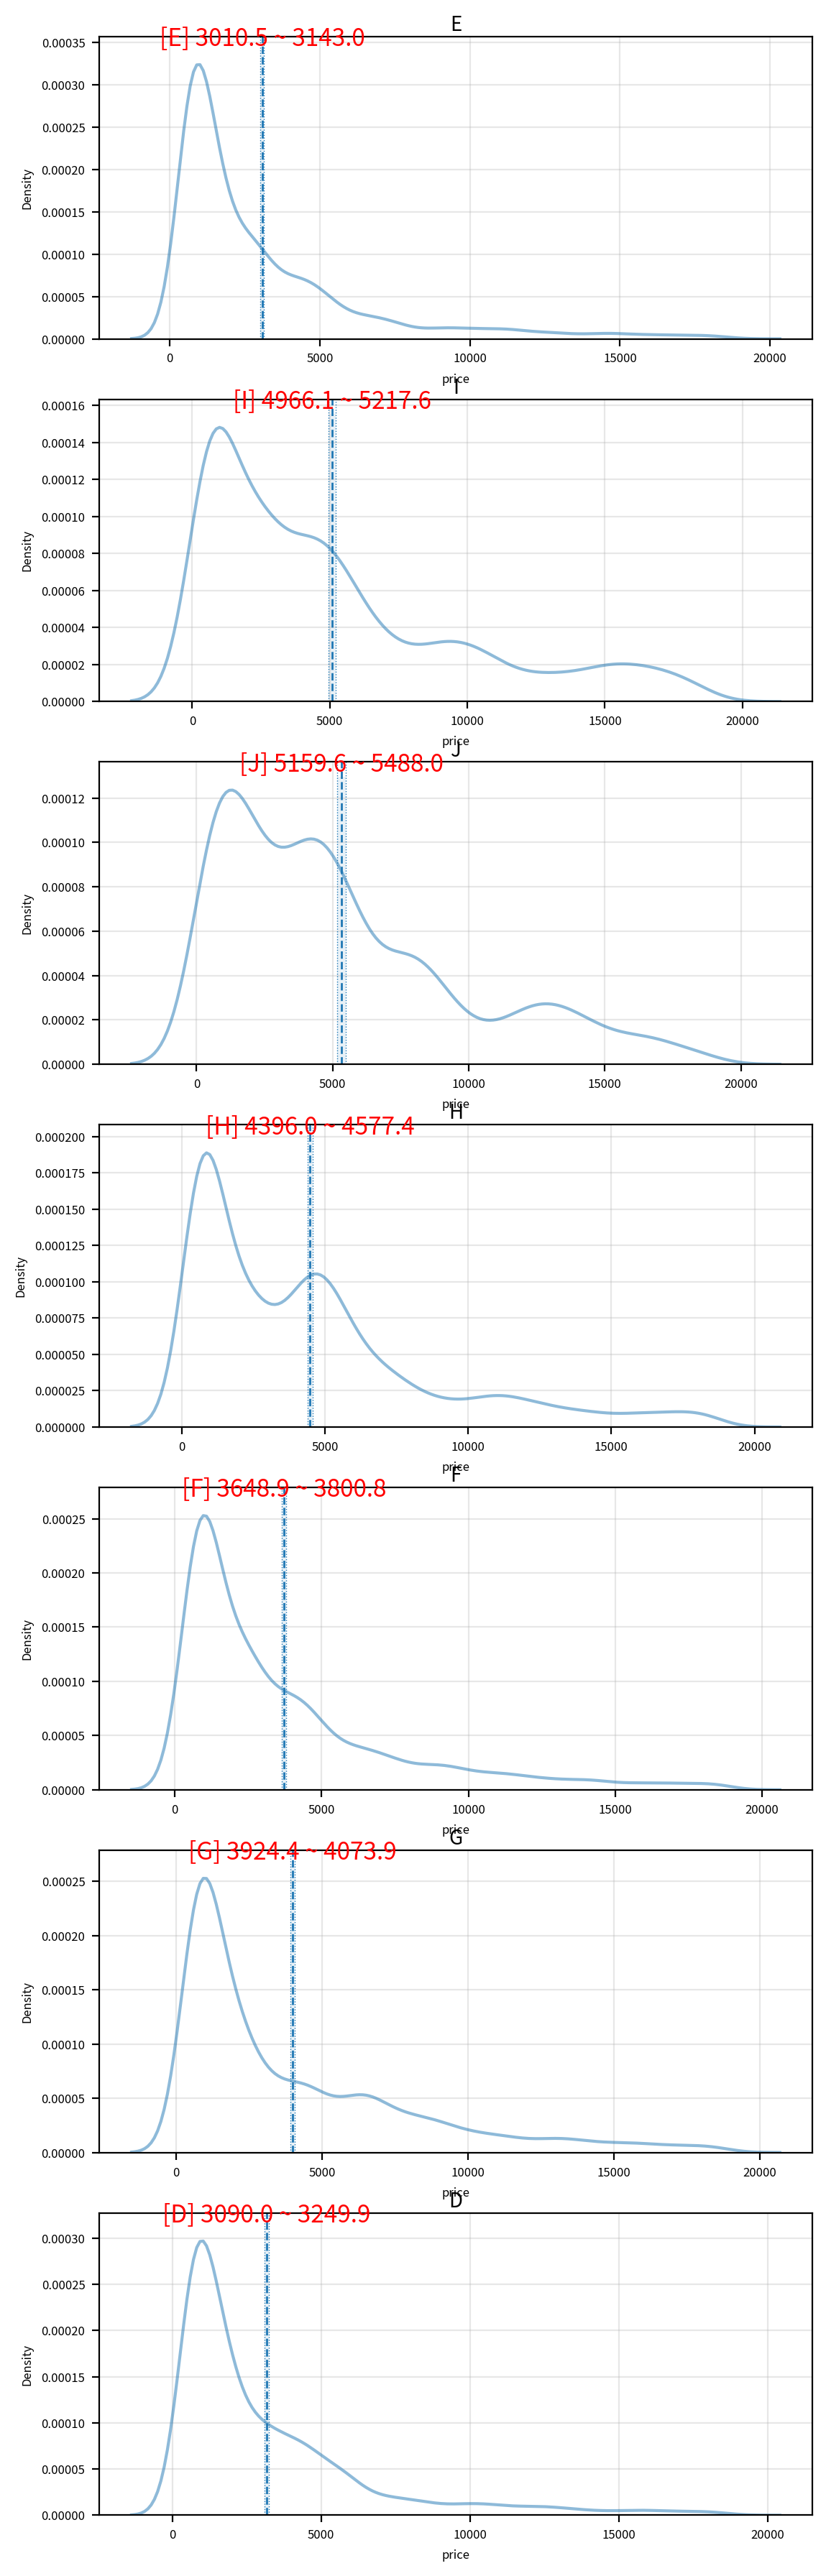

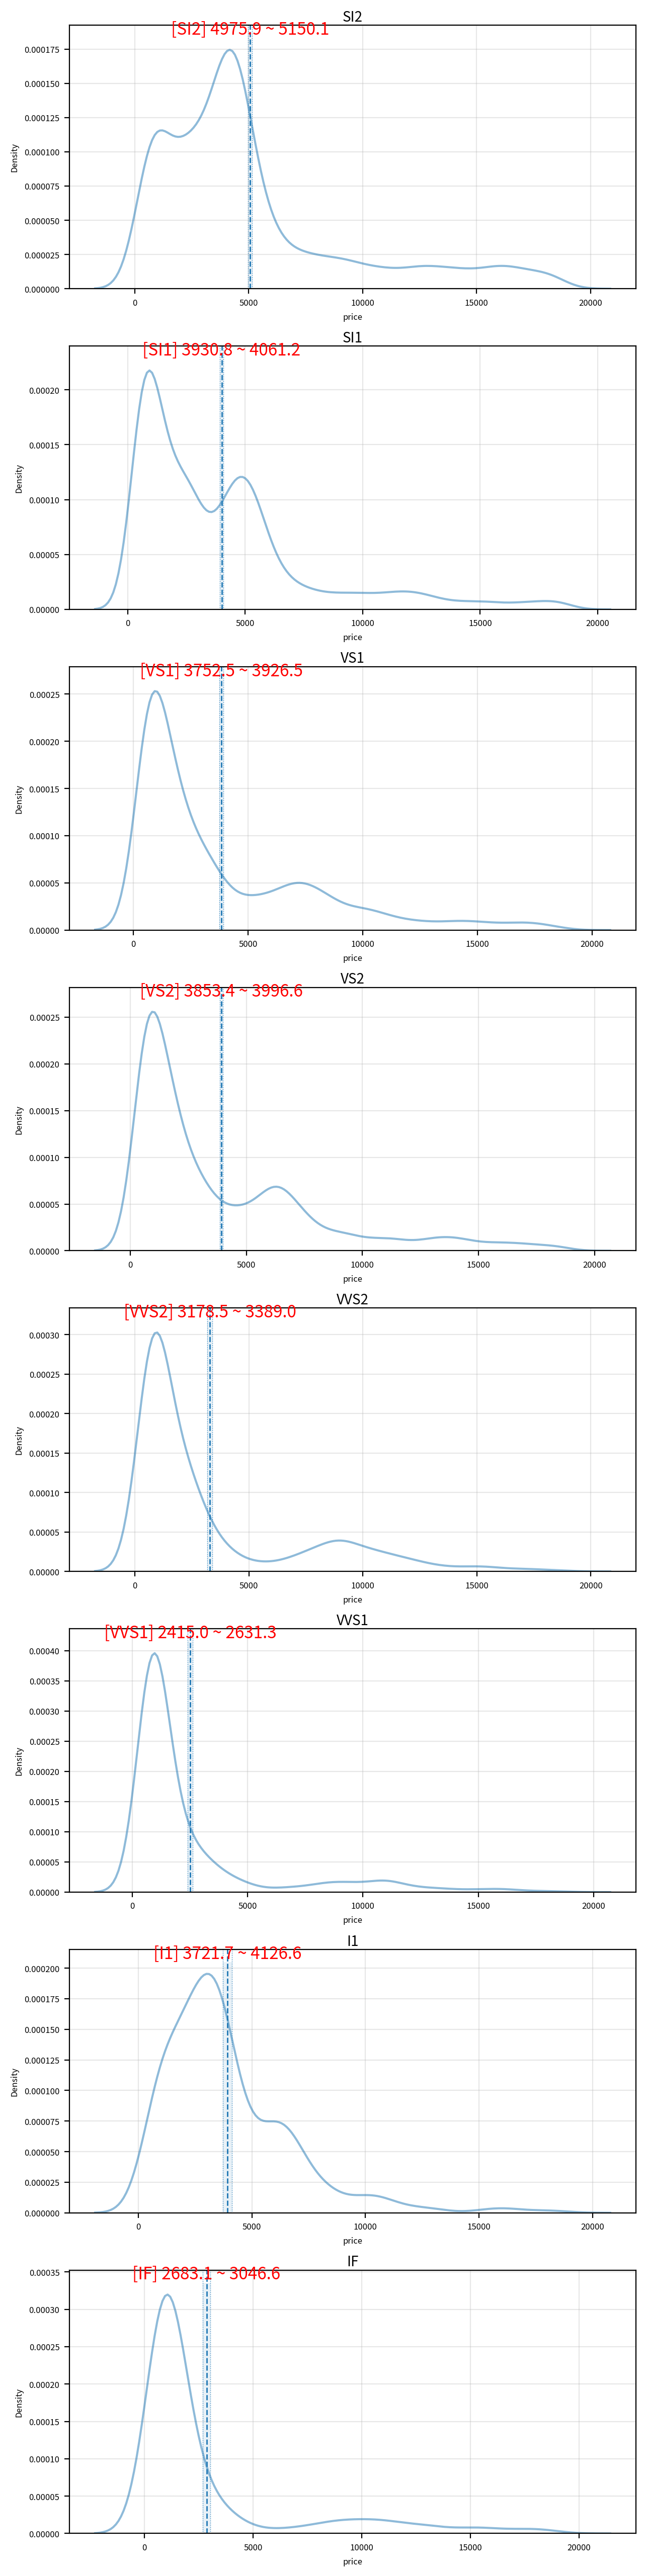

In [99]:
# 확인할 데이터 필드 (수치형):
field = 'price'
# 확인할 데이터 필드 (명목형):
nominal = ['cut', 'color', 'clarity']

for items in nominal:
    # 집단 구분용 필드 (범주형, hue):
    hue_field = items

    # 요일 종류: 
    hue_values = df[hue_field].unique()
    hue_count = len(hue_values)

    # 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
    width_px = 1280             # 그래프 가로 크기
    height_px = 640 * hue_count         # 그래프 세로 크기
    rows = hue_count                    # 그래프 행 수
    cols = 1                    # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

    for i, v in enumerate(hue_values):
        temp = df[df[hue_field] == v]
        #display(temp)

        # 2) KDE plot 그리기:
        sb.kdeplot(data=temp, x=field, fill=False, ax = ax[i], alpha=0.5)
        ax[i].grid(True, alpha=0.3)
        ax[i].set_title(v, fontsize=10, pad=3)

        # 신뢰구간용 기본변수:
        max = temp[field].max()                        # 최대값
        dof = len(temp[field]) - 1                     # 자유도
        clevel = 0.95                                  # 신뢰수준
        sp_mean = temp[field].mean()                   # 표본평균
        sp_std = temp[field].std(ddof=1) # default: ddof=1   # 표본표준편차
        sp_std_error = sp_std / sqrt(len(temp[field])) # 표본표준오차

        cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

        ax[i].axvline(cmin, linestyle=":", linewidth=0.5) # cmin 경계선
        ax[i].axvline(cmax, linestyle=":", linewidth=0.5) # cmax 경계선

        # 신뢰구간 y값, 평균표시:
        ymin, ymax = ax[i].get_ylim()
        ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
        ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

        # 텍스트 그리기 (statAnnotator 기능):
        ax[i].text(x = cmin + (cmax-cmin)/2,
                y=ymax,
                s="[%s] %0.1f ~ %0.1f" % (v, cmin, cmax),
                horizontalalignment = "center",
                verticalalignment = "bottom",
                fontdict = {"size": 12, "color": "red"})

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료